# Blob Detection and Connected Components

Blob detection and connected components are important techniques in computer vision used in a wide range of fields, from autonomous vehicles to facial recognition. In this blog post, we'll explore these concepts in depth, including the methods used for blob detection and the practical applications of connected components. Whether you're a beginner or an experienced practitioner, this post will provide you with valuable insights into these crucial techniques in computer vision.

### Blob detection

Blob detection is a technique used in computer vision to identify regions in an image that differ in properties like color or texture from their surroundings. The Laplacian of Gaussian, Difference of Gaussian, and Determinant of Hessian are common methods for blob detection. The Laplacian of Gaussian filters the image with a Gaussian filter and then applies the Laplacian operator to find regions of high curvature. The Difference of Gaussian technique creates a scale-space representation of the image and subtracts one blurred version from another to enhance the edges of objects. Finally, the Determinant of Hessian method detects blobs by analyzing the second derivatives of the image and finding regions with high curvature.

First, we are going to convert our sample image into binary or black and white before applying different blob detection methods. Converting an image to black and white, or grayscale, removes the color information and reduces the image to only shades of gray. This simplification of the image makes it easier to identify and analyze features such as edges, corners, and blobs. By reducing the image to a single channel, the algorithm can focus on analyzing the intensity information in the image, rather than having to take into account different color channels.

Our sample image is generated from Microsoft Designer with the prompt: "coffee beans on a  white table all separated and centered, top view, 8k"

In [100]:
import os
os.environ['SKIMAGE_DATADIR'] = '/tmp/.skimage_cache'

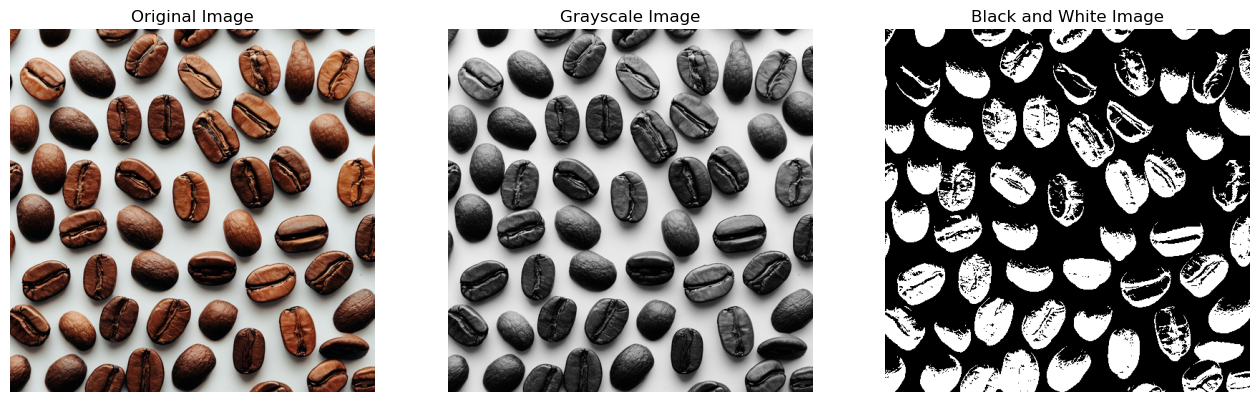

In [101]:
from skimage.io import imread, imshow
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

coffee_og = imread('coffee.PNG')
coffee_gr = rgb2gray(coffee_og[:,:,:3])
coffee_bw = (coffee < 0.25)*1
coffee_mask = coffee < 0.25

fig, ax = plt.subplots(1, 3, figsize=(16,8))
ax[0].imshow(coffee_og, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original Image')
ax[1].imshow(coffee_gr, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Grayscale Image')
ax[2].imshow(coffee_bw, cmap='gray')
ax[2].axis('off')
ax[2].set_title('Black and White Image');

Let's now apply the different blob detection methods namely the laplacian of Gaussian, difference of gaussian and determinant of hessian to our sample generated image. If you are interested to read more about them, read here: https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_blob.html

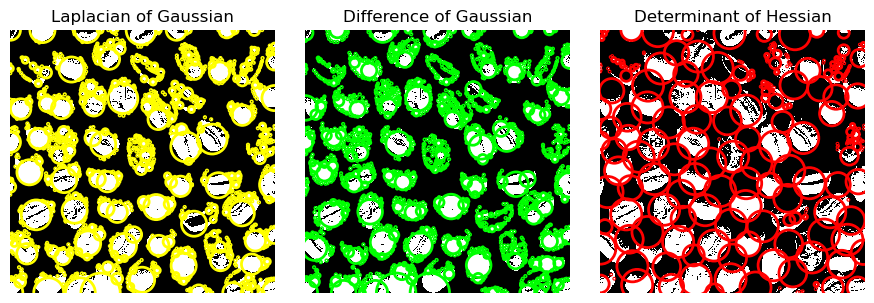

In [102]:
import numpy as np
from math import sqrt
from skimage.feature import blob_dog, blob_log, blob_doh

blobs_log = blob_log(coffee_mask, max_sigma=30, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(coffee_mask, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(coffee_mask, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian',
          'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(coffee_bw, interpolation='nearest', cmap='gray')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

### Connected components

Connected components are groups of pixels in an image that share a common property, such as color or intensity. They are often used in image segmentation to separate objects in an image. The connected components algorithm works by examining neighboring pixels and assigning them to a component if they meet certain criteria. This process continues until all pixels in the image have been assigned to a component. Once the connected components have been identified, they can be labeled and further analyzed or processed. Overall, blob detection and connected components are useful tools for analyzing and understanding images in computer vision applications.

If you want to read more about the different morphological operations, visit my other blog here!: https://medium.com/@vjlglopez/the-building-blocks-of-smartphone-cameras-how-filtering-and-morphological-operations-elevate-5fc9eba10ebf

To read more about regionprops and other packages, visit this link: https://scikit-image.org/docs/stable/api/skimage.measure.html

In [103]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.measure import label, regionprops
from skimage.color import label2rgb

def multi_dil(im, num):
    """
    Apply multiple iterations of dilation to the input image.
    
    Returns
    -------
    array_like
        Dilated image.

    """
    for i in range(num):
        im = dilation(im)
    return im


def multi_ero(im, num):
    """
    Apply multiple iterations of erosion to the input image.
    
    Returns
    -------
    array_like
        Eroded image.

    """
    for i in range(num):
        im = erosion(im)
    return im

We first have to clean our image to make it easier to process. We are going to perform a combination of multiple dilation and erosion to remove some connectivity within our image that has been converted to black and white.

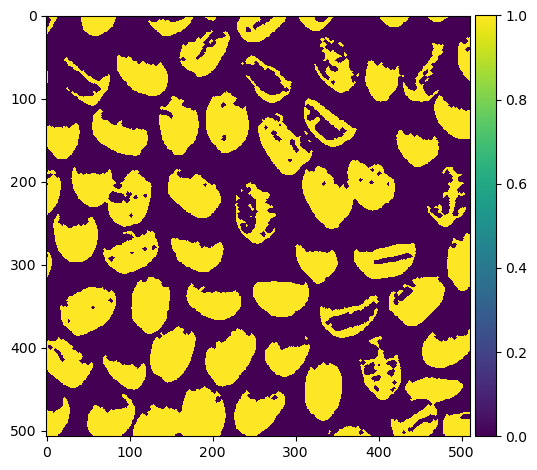

In [108]:
im_cleaned = (multi_dil(multi_ero(multi_dil(coffee_bw,2),3),1))
imshow(im_cleaned);

Now using the label function from skimage, we are going to label the different components from our image. If you are interested to read more about this, visit this: https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label

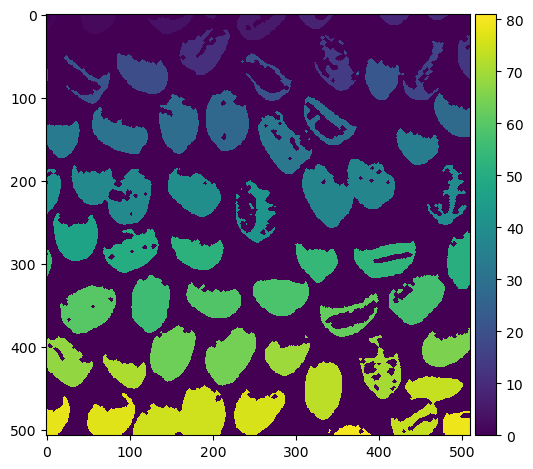

In [110]:
label_im = label(im_cleaned)
imshow(label_im);

You may ask why there are more than 80 components detected and that is because the image we fed into the label function is not the cleanest version of it yet. However, for our example, we can already select a label that can get the different properties using regionprops. If you are interested in reading more about regionprops, check this page: https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops

Now let's check out some of the region properties of the bean with the label 40.

1. Area is the total number of pixels inside the region.
2. Perimeter is the length of the boundary of the region.
3. Bbox is the bounding box of the region, represented as [min_row, min_col, max_row, max_col].
4. Bbox_area is the area of the bounding box of the region.
5. Centroid is the center of mass of the region, represented as (row, col).
6. Convex_image is the convex hull of the region, represented as a binary image.
7. Convex_area is the area of the convex hull of the region.
8. Eccentricity is a measure of how elongated the region is, with 0 being a perfect circle and 1 being a line.
9. Major_axis_length is the length of the major axis of the ellipse that has the same normalized second central moments as the region.
10. Minor_axis_length is the length of the minor axis of the ellipse that has the same normalized second central moments as the region.

Area:              686.0
Perimeter:         147.88225099390854
Bbox:              (187, 0, 241, 18)
Bbox Area:         972.0
Centroid:          (212.14431486880466, 7.333819241982507)
Convex Area:       760.0
Eccentricity:      0.9366902302196339
Major Axis Length: 52.10785189280884
Minot Axis Length: 18.246039808814352


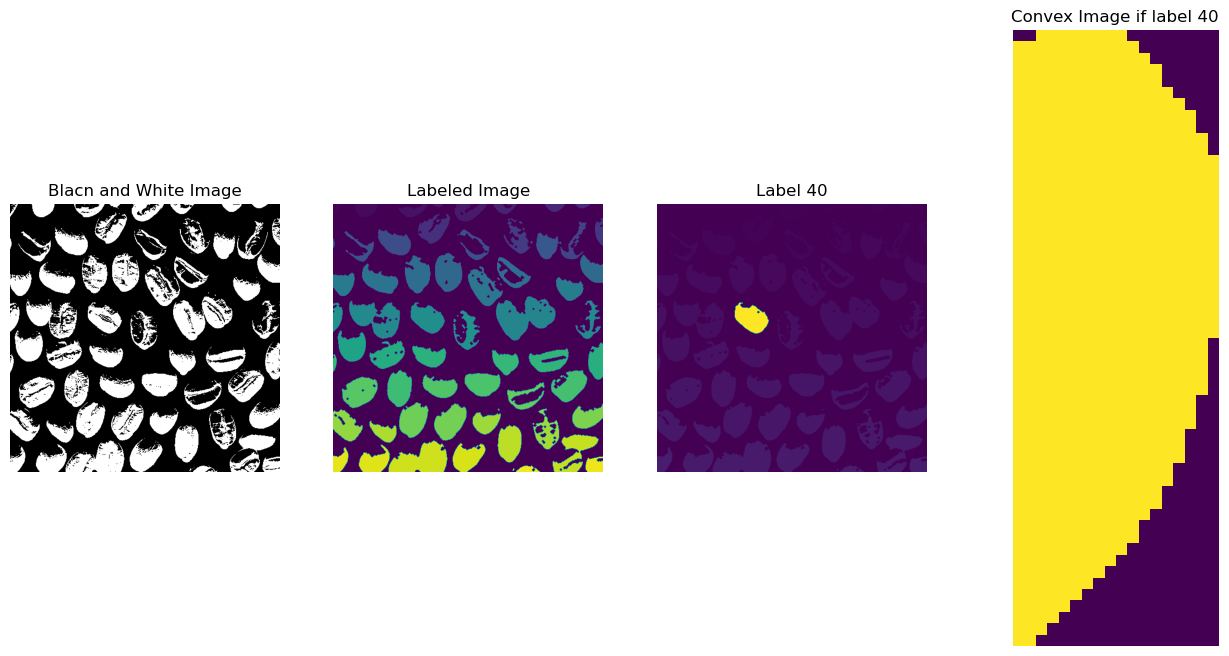

In [134]:
label_40 = (label_im==40)*1000 + label_im
props = regionprops(label_im)

print(f'Area:              {props[40].area}')
print(f'Perimeter:         {props[40].perimeter}')
print(f'Bbox:              {props[40].bbox}')
print(f'Bbox Area:         {props[40].bbox_area}')
print(f'Centroid:          {props[40].centroid}')
print(f'Convex Area:       {props[40].convex_area}')
print(f'Eccentricity:      {props[40].eccentricity}')
print(f'Major Axis Length: {props[40].major_axis_length}')
print(f'Minot Axis Length: {props[40].minor_axis_length}')

fig, ax = plt.subplots(1, 4, figsize=(16,8))
ax[0].imshow(coffee_bw, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Blacn and White Image')
ax[1].imshow(label_im)
ax[1].axis('off')
ax[1].set_title('Labeled Image')
ax[2].imshow(label_40)
ax[2].axis('off')
ax[2].set_title('Label 40')
ax[3].imshow(props[40].convex_image)
ax[3].axis('off')
ax[3].set_title('Convex Image if label 40');

In conclusion, blob detection and connected components are powerful techniques in computer vision that have many practical applications in a wide range of fields. By understanding these concepts and the methods used to implement them, you'll be well-equipped to tackle a variety of image processing and analysis tasks. Whether you're interested in object detection, feature extraction, or image segmentation, blob detection and connected components are essential tools in your toolkit. We hope this beginner's guide has given you a solid foundation for exploring these concepts further, and we encourage you to continue your learning journey by exploring more advanced techniques in computer vision.